<a href="https://colab.research.google.com/github/ParsaFotowat/ML_Projects/blob/main/Housing_prices(Linear_Reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [8]:
df=pd.read_csv("USA_Housing.csv")

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
sns.pairplot(df)

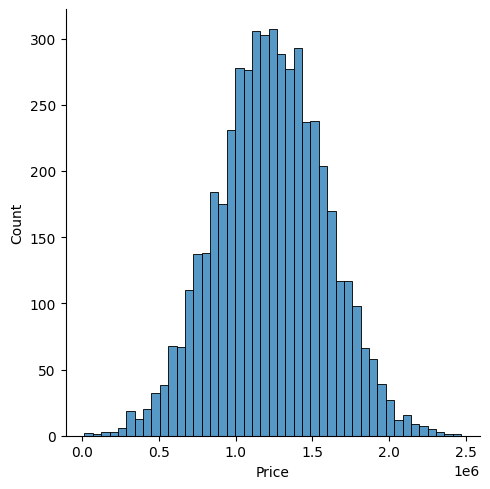

In [14]:
sns.displot(df['Price'])

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

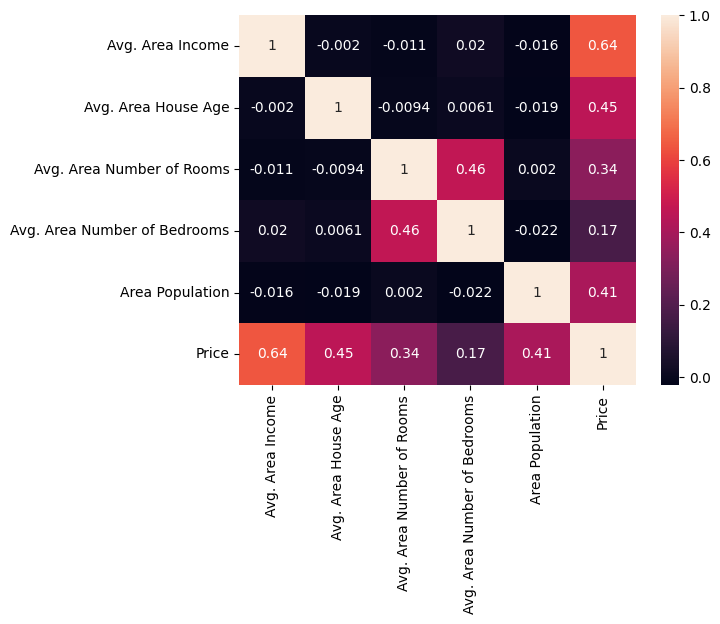

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [48]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]


In [49]:
y=df[['Price']]

In [50]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.4, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()

In [51]:
lm.fit(x_train,y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

[-2640159.7968527]


In [41]:
lm.coef_

array([[2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]])

In [54]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [55]:
prediction=lm.predict(x_test)

In [56]:
prediction

array([[1260960.70567627],
       [ 827588.75560329],
       [1742421.24254344],
       ...,
       [ 372191.40626917],
       [1365217.15140898],
       [1914519.5417888 ]])

In [58]:
y_test

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
...,...
1776,1.489520e+06
4269,7.777336e+05
1661,1.515271e+05
2410,1.343824e+06


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(y_test, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(y_test, *['Price'], **{})
chart

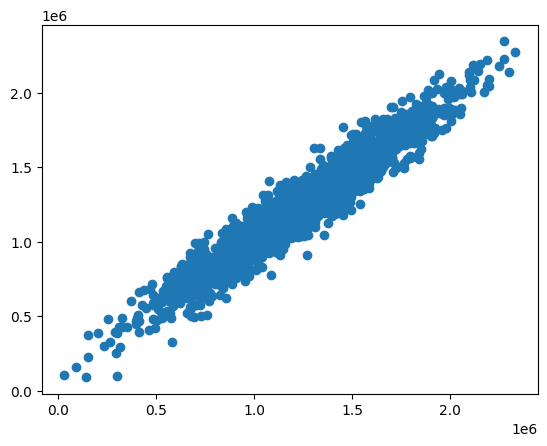

In [59]:
plt.scatter(y_test,prediction)

<ipython-input-60-0e5e279aab22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

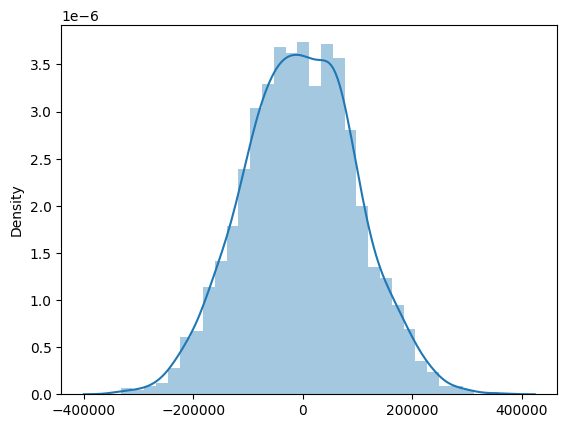

In [60]:
sns.distplot(y_test-prediction)

In [62]:
from sklearn import metrics

In [63]:
metrics.mean_absolute_error(y_test,prediction)

82288.22251914942

In [65]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

102278.82922290897